In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["font.size"] = 11

from functools import partial, reduce
from itertools import product

import seaborn as sns


from analyze_data import result, get_summary

from create_figures import add_p_bars, boxplot, add_multilevel_xticks, lineplot

folder = '/media/raphael/PortableSSD/diploma_thesis/Data'

# Figure 1
## Plan
1. Schematic
2. GFP Fluorometry + Densitometry
3. GFP WB

## GFP Fluorormetry


In [2]:
gfp_f = result().read(f'{folder}/1. Plasmid can degrade GFP/Flourometry/Results.csv')

In [3]:
gfp_f.summarize(values = "Mean_norm").head()

,mean,sd,ci_lo,ci_hi,count
Group1,,,,,
X,1.000000,0.266069,0.877256,1.117915,18
TP,0.543881,0.160083,0.471228,0.613265,20
FY,0.751310,0.297984,0.636192,0.870026,20


In [4]:
gfp_f.create_p_table().round(decimals=3).head()

,Group1,p,star
Group1,,,
X,TP,0.000,****
X,FY,0.006,**


(0.0, 180.0)

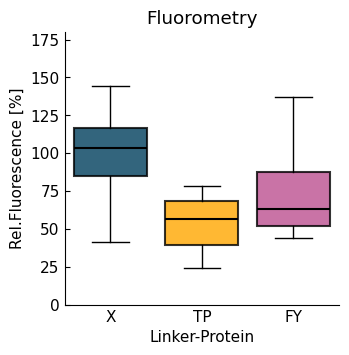

In [5]:
from matplotlib.ticker import AutoMinorLocator

def prettify_boxplot(ax, box, palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"]):

    for i, b in enumerate(box['boxes']):
        b.set_facecolor(palette[i%len(palette)])
        b.set_alpha(0.8)
        b.set_linewidth(1.5)
    for m in box['medians']:
      m.set(
        color = "black",
        linewidth = 1.5
      )
    ax.tick_params(bottom = False)
    ax.tick_params(which = "minor", left = False)
    return ax

def prettify(ax, *args,
             title = None,
             x = ("x-axis", ""),
             y = ("y-axis", ""),
             **kwargs):
    ax.set_title(title)
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xlabel(x[0] if len(x[1])==0 else f"{x[0]} [{x[1]}]")
    ax.set_ylabel(y[0] if len(y[1])==0 else f"{y[0]} [{y[1]}]")
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which = "both", 
                   direction = "in")
    return ax

def boxplot(data, 
            x=None, 
            y=None ,
            ax=None, 
            y_scale = 1,
            **kwargs):
    datalist = [data.loc[data[x]==xs, y].values * y_scale for xs in data.loc[:,x].unique()]
    box = ax.boxplot(datalist,
                    positions = range(len(datalist)),
                    patch_artist=True,
                    showfliers=False,
                    **kwargs
                )
    return ax, box

fig1,ax = plt.subplots(figsize = (3.54,3.54))
ax, box = boxplot(data = gfp_f.df,
                 x = "Group1",
                 y = "Mean_norm",
                 widths = 0.8,
                 y_scale = 100,
                 ax=ax)
ax = prettify(ax,
              title = "Fluorometry",
              x = ("Linker-Protein",""),
              y = ("Rel.Fluorescence","%"))
ax = prettify_boxplot(ax, box)
ax.set_xticklabels(["X","TP","FY"])
ax.set_ylim(0, 180)

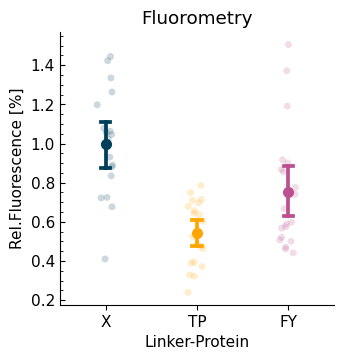

In [6]:
from matplotlib.ticker import AutoMinorLocator

def prettify(ax, *args,
             title = None,
             x = ("x-axis", ""),
             y = ("y-axis", ""),
             **kwargs):
    ax.set_title(title)
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xlabel(x[0] if len(x[1])==0 else f"{x[0]} [{x[1]}]")
    ax.set_ylabel(y[0] if len(y[1])==0 else f"{y[0]} [{y[1]}]")
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which = "both", 
                   direction = "in")
    return ax

def prettify_pointplot(ax):
    ax.tick_params(bottom = True)
    return ax

def pointplot(data, 
                x=None, 
                y=None ,
                hue = None,
                ax=None, 
                y_scale = 1,
                rm_outliers = False,
                thin = 1,
                jitter = 0.2,
                d_bool = False,
                palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"],
                **kwargs):
    if x == hue:
        d_bool = False
        dodge = False
    sns.stripplot(
    data=data, x=x, y=y, hue=hue,
    dodge=d_bool, alpha=.2, legend=False,
    palette=palette,
    ax=ax
    )
    sns.pointplot(
        data=data, x=x, y=y, hue=hue,
        dodge=dodge, errorbar="ci",
        marker="o", markersize=5, markeredgewidth=3,
        capsize = 0.1,
        ax=ax,
        palette=palette
    )
    return ax

fig1,ax = plt.subplots(figsize = (3.54,3.54))
ax = pointplot(data = gfp_f.df,
                 x = "Group1",
                 y = "Mean_norm",
                 hue = "Group1",
                 y_scale = 1,
                 jitter = 0.4,
                 ax=ax)
ax = prettify(ax,
              title = "Fluorometry",
              x = ("Linker-Protein",""),
              y = ("Rel.Fluorescence","%"))
ax = prettify_pointplot(ax)
ax.tick_params(axis = "x",which = "both", 
                   direction = "out")
fig1.tight_layout
fig1.savefig("../../plots/Fig1_Fluorometry.svg", format = "svg")

# Densitometry

In [7]:
gfp_d = result().read(f'{folder}/1. Plasmid can degrade GFP/WB/Results.csv')
gfp_d.df.head()

,Unnamed: 0,Lane,b-Actin,GFP,Group1,b-Actin_rel,GFP_rel,b-Actin_norm,GFP_norm,Try
0,0,1,17225.338,48210.451,X,17225.338,2.798810,1.000000,1.000000,1
1,1,2,13609.539,27924.037,TP,13609.539,2.051799,0.790088,0.733097,1
2,2,3,8424.388,19877.238,FY,8424.388,2.359487,0.489070,0.843032,1
3,3,1,46751.392,51865.321,X,46751.392,1.109386,1.000000,1.000000,2
4,4,2,35862.966,32052.359,TP,35862.966,0.893745,0.767099,0.805622,2


In [8]:
gfp_d.summarize(values = "GFP_norm").head()

,mean,sd,ci_lo,ci_hi,count
Group1,,,,,
X,1.000000,0.000000,1.000000,1.000000,2
TP,0.769359,0.036263,0.733097,0.805622,2
FY,0.787002,0.056030,0.730972,0.843032,2


In [9]:
gfp_d.create_p_table().round(decimals=3).head()

/home/raphael/miniforge3/envs/mdthesis/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Group1,p,star
Group1,,,
X,TP,0.012,*
X,FY,0.031,*


/tmp/ipykernel_15268/2608333770.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["X","TP","FY"])


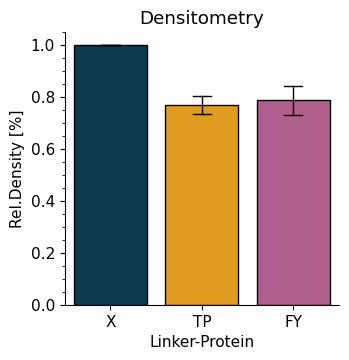

In [10]:
fig2,ax = plt.subplots(figsize = (3.54,3.54))
ax = sns.barplot(data = gfp_d.df,
                x = "Group1",
                y = "GFP_norm",
                hue = "Group1",
                legend = False,
                ax = ax,
                palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"],
                seed = 888,
                alpha = 1,
                capsize = 0.2,
                err_kws = {
                     "linewidth": 1,
                     "color":"0"
                })
ax = sns.barplot(data = gfp_d.df,
                x = "Group1",
                y = "GFP_norm",
                ax = ax,
                color = "k",
                fill = False,
                linewidth = 1,
                errorbar = None)
ax = prettify(ax,
              title = "Densitometry",
              x = ("Linker-Protein",""),
              y = ("Rel.Density","%"))
ax.set_xticklabels(["X","TP","FY"])
ax.tick_params(axis = "x",direction = "out")
ax.tick_params(axis = "y",which="both",direction = "out")
fig2.tight_layout
fig2.savefig("../../plots/Fig1_Dens.svg", format = "svg")

# WB

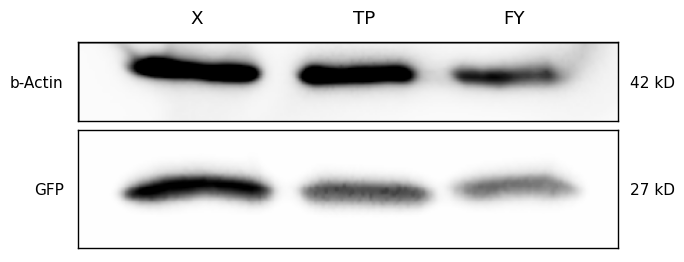

In [12]:
from create_figures import WesternBlot
import skimage as ski

image1 = ski.io.imread(f'{folder}/1. Plasmid can degrade GFP/WB/Img_Final/0_b-Actin.png')
image2 = ski.io.imread(f'{folder}/1. Plasmid can degrade GFP/WB/Img_Final/1_GFP.png')
fig3, ax = plt.subplots(figsize = (7.08, 3.54))
wb = (WesternBlot(border = 0.1)
      .add_lane(image = image2,
                protein ="GFP",
                weight = 27)
      .add_lane(image = image1,
                protein ="b-Actin",
                weight = 42)
      .add_labels(["X","TP","FY"])
      .plot(ax))

fig3.savefig("WB.svg", format = "svg")